In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import Counter
# print(os.listdir("../Downloads"))

In [2]:
data = pd.read_csv('c:/Users/User/Downloads/data.csv')
data.tail()

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1885,tt0120903,0.182246,75000000,157299717,X-Men,Patrick Stewart|Hugh Jackman|Ian McKellen|Hall...,Bryan Singer,Evolution Begins,"Two mutants, Rogue and Wolverine, come to a pr...",104,Adventure|Action|Science Fiction,Twentieth Century Fox Film Corporation|Donners...,7/13/2000,2766,6.6,2000
1886,tt0192255,0.123920,22000000,13555988,The Little Vampire,Richard E. Grant|Jonathan Lipnicki|Jim Carter|...,Uli Edel,"They're not just best friends, they're blood b...","Based on the popular books, the story tells of...",95,Horror|Family|Foreign,New Line Cinema,10/27/2000,42,6.4,2000
1887,tt0131704,0.104908,76000000,35134820,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,Des McAnuff,This summer it's not the same old bull.,Rocky and Bullwinkle have been living off the ...,88,Adventure|Animation|Action|Comedy|Family,Universal Pictures|Capella International|KC Me...,6/30/2000,35,4.0,2000
1888,tt0162983,0.031018,40000000,36037909,Hanging Up,Meg Ryan|Diane Keaton|Lisa Kudrow|Walter Matth...,Diane Keaton,Every family has a few hang-ups.,A trio of sisters bond over their ambivalence ...,94,Comedy|Drama,Laurence Mark Productions|Columbia Pictures Co...,2/16/2000,21,5.2,2000
1889,tt0163676,0.015997,15000000,5217498,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,Mary Lambert,What would you do to get in?,A mentally disturbed young woman takes a job a...,105,Thriller,Warner Bros. Pictures,7/19/2000,12,5.2,2000


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1890 non-null   object 
 1   popularity            1890 non-null   float64
 2   budget                1890 non-null   int64  
 3   revenue               1890 non-null   int64  
 4   original_title        1890 non-null   object 
 5   cast                  1890 non-null   object 
 6   director              1890 non-null   object 
 7   tagline               1890 non-null   object 
 8   overview              1890 non-null   object 
 9   runtime               1890 non-null   int64  
 10  genres                1890 non-null   object 
 11  production_companies  1890 non-null   object 
 12  release_date          1890 non-null   object 
 13  vote_count            1890 non-null   int64  
 14  vote_average          1890 non-null   float64
 15  release_year         

None

In [4]:
len(data)

1890

# Вопросы
1. У какого фильма из списка самый большой бюджет?
2. Какой из фильмов самый длительный (в минутах)
3. Какой из фильмов самый короткий (в минутах)
4. Средняя длительность фильма?
5. Средняя длительность фильма по медиане?

6. Какой самый прибыльный фильм?
7. Какой фильм самый убыточный?
8. Сколько всего фильмов в прибыли? (дохода больше чем потраченого бюджета)
9. Самый прибыльный фильм в 2008 году?
10. Самый убыточный фильм за период с 2012 по 2014 (включительно)?

11. Какого жанра фильмов больше всего?
12. Какого жанра среди прибыльных фильмов больше всего?

13. Кто из режисеров снял больше всего фильмов?
14. Кто из режисеров снял больше всего Прибыльных фильмов?
15. Кто из режисеров принес больше всего прибыли?

16. Какой актер принес больше всего прибыли?
17. Какой актер принес меньше всего прибыли в 2012 году?
18. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по выборке)
19. В фильмах какого жанра больше всего снимался Nicolas Cage?    

20. Какая студия сняла больше всего фильмов?
21. Какая студия сняла больше всего фильмов в 2015 году?
22. Какая студия заработала больше всего денег в жанре комедий за все время?
23. Какая студия заработала больше всего денег в 2014 году?
24. Самый убыточный фильм от Paramount Pictures
25. Какой Самый прибыльный год (заработали больше всего)?
26. Какой Самый прибыльный год для студии Warner Bros?
27. В каком месяце за все годы суммарно вышло больше всего фильмов?
28. Сколько вышло фильмов летом? (за июнь, июль, август)
29. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
30. Какой месяц чаще всего по годам самый прибыльный?
31. Названия фильмов какой студии в среднем самые длинные по количеству символов?
32. По количеству слов?
33. Сколько разных слов используется в названиях фильмов?(без учета регистра)
34. Какие фильмы входят в 1 процент лучших по рейтингу IMDB?
35. Какие актеры чаще всего снимаются в одном фильме вместе

# Предобработка датасета

In [5]:
answer_ls = [] # создадим список с ответами. сюда будем добавлять ответы по мере прохождения теста
# сюда можем вписать создание новых колонок в датасете

In [6]:
data['profit'] = data['revenue'] - data['budget']

# Вопрос 1. У какого фильма из списка самый большой бюджет?
Варианты ответов:
1. The Dark Knight Rises (tt1345836)
2. Spider-Man 3 (tt0413300)
3. Avengers: Age of Ultron (tt2395427)
4. The Warrior's Way	(tt1032751)
5. Pirates of the Caribbean: On Stranger Tides (tt1298650)

In [7]:
data.original_title[data.budget.idxmax()]

"The Warrior's Way"

In [8]:
# Top 10 по бюджету
data[['budget', 'original_title', 'imdb_id']].sort_values(
    'budget', ascending=False)[:10]

,budget,original_title,imdb_id
491,425000000,The Warrior's Way,tt1032751
724,380000000,Pirates of the Caribbean: On Stranger Tides,tt1298650
1670,300000000,Pirates of the Caribbean: At World's End,tt0449088
14,280000000,Avengers: Age of Ultron,tt2395427
1015,260000000,John Carter,tt0401729
380,260000000,Tangled,tt0398286
1677,258000000,Spider-Man 3,tt0413300
1246,255000000,The Lone Ranger,tt1210819
123,250000000,The Hobbit: The Battle of the Five Armies,tt2310332
1187,250000000,The Hobbit: The Desolation of Smaug,tt1170358


In [9]:
# тут вводим ответ и добавлем в его список ответов
answer_ls.append(4)

# Вопрос 2. Какой из фильмов самый длительный (в минутах)
1. The Lord of the Rings: The Return of the King	(tt0167260)
2. Gods and Generals	(tt0279111)
3. King Kong	(tt0360717)
4. Pearl Harbor	(tt0213149)
5. Alexander	(tt0346491)

In [10]:
data.original_title[data.runtime.idxmax()]

'Gods and Generals'

In [11]:
# Top 10 по бюджету
data[['runtime', 'original_title', 'imdb_id']].sort_values(
    'runtime', ascending=False)[:10]

,runtime,original_title,imdb_id
1158,214,Gods and Generals,tt0279111
1082,201,The Lord of the Rings: The Return of the King,tt0167260
1737,191,Grindhouse,tt0462322
1337,187,King Kong,tt0360717
505,183,Pearl Harbor,tt0213149
1184,180,The Wolf of Wall Street,tt0993846
864,179,The Lord of the Rings: The Two Towers,tt0167261
497,178,The Lord of the Rings: The Fellowship of the Ring,tt0120737
1602,175,Alexander,tt0346491
994,172,Cloud Atlas,tt1371111


In [12]:
answer_ls.append(2)

# 3. Какой из фильмов самый короткий (в минутах)
Варианты ответов:

1. Home on the Range	tt0299172
2. The Jungle Book 2	tt0283426
3. Winnie the Pooh	tt1449283
4. Corpse Bride	tt0121164
5. Hoodwinked!	tt0443536

In [13]:
data.original_title[data.runtime.idxmin()]

'Winnie the Pooh'

In [14]:
# Top 10 по краткости
data[['runtime', 'original_title', 'imdb_id']].sort_values('runtime')[:10]

,runtime,original_title,imdb_id
769,63,Winnie the Pooh,tt1449283
931,72,Return to Never Land,tt0280030
1098,72,The Jungle Book 2,tt0283426
1627,76,Home on the Range,tt0299172
1409,76,Valiant,tt0361089
1349,77,Corpse Bride,tt0121164
885,78,Stuart Little 2,tt0243585
1808,78,The Emperor's New Groove,tt0120917
252,79,9,tt0472033
1769,80,Vacancy,tt0452702


In [15]:
answer_ls.append(3)

#  4. Средняя длительность фильма?

Варианты ответов:

1.115

2.110

3.105

4.120

5.100

In [16]:
round(data['runtime'].mean())
#  the right answer is 2

110

In [17]:
answer_ls.append(2)

# 5. Средняя длительность фильма по медиане?
Варианты ответов:
1. 106
2. 112
3. 101
4. 120
5. 115




In [18]:
import math

In [19]:
math.floor(data['runtime'].median())
#  the right answer is 1

106

In [20]:
answer_ls.append(1)

# 6. Какой самый прибыльный фильм?
Варианты ответов:
1. The Avengers	tt0848228
2. Minions	tt2293640
3. Star Wars: The Force Awakens	tt2488496
4. Furious 7	tt2820852
5. Avatar	tt0499549

In [21]:
data.original_title[data.profit.idxmax()]

'Avatar'

In [22]:
# Top 10 по прибыли
data[['profit', 'original_title', 'imdb_id']].sort_values(
    'profit', ascending=False)[:10]

,profit,original_title,imdb_id
239,2544505847,Avatar,tt0499549
3,1868178225,Star Wars: The Force Awakens,tt2488496
0,1363528810,Jurassic World,tt0369610
4,1316249360,Furious 7,tt2820852
971,1299557910,The Avengers,tt0848228
723,1202817822,Harry Potter and the Deathly Hallows: Part 2,tt1201607
14,1125035767,Avengers: Age of Ultron,tt2395427
1178,1124219009,Frozen,tt2294629
8,1082730962,Minions,tt2293640
1082,1024888979,The Lord of the Rings: The Return of the King,tt0167260


In [23]:
answer_ls.append(5)

# 7. Какой фильм самый убыточный?
Варианты ответов:
1. Supernova tt0134983
2. The Warrior's Way tt1032751
3. Flushed Away	tt0424095
4. The Adventures of Pluto Nash	tt0180052
5. The Lone Ranger	tt1210819

In [24]:
data.original_title[data.profit.idxmin()]

"The Warrior's Way"

In [25]:
data[['profit', 'original_title', 'imdb_id']].sort_values('profit')[:10]

,profit,original_title,imdb_id
491,-413912431,The Warrior's Way,tt1032751
1246,-165710090,The Lone Ranger,tt1210819
1617,-119180039,The Alamo,tt0318974
810,-111007242,Mars Needs Moms,tt1305591
959,-92896027,The Adventures of Pluto Nash,tt0180052
1465,-84540684,Flushed Away,tt0424095
637,-80445998,Australia,tt0455824
1873,-75171919,Supernova,tt0134983
1401,-74010360,A Sound of Thunder,tt0318081
1719,-71626175,Awake,tt0211933


In [26]:
answer_ls.append(2)

# 8. Сколько всего фильмов в прибыли?
Варианты ответов:
1. 1478
2. 1520
3. 1241
4. 1135
5. 1398


In [27]:
len(data[data.profit>0])

1478

In [28]:
answer_ls.append(1)

# 9. Самый прибыльный фильм в 2008 году?
Варианты ответов:
1. Madagascar: Escape 2 Africa	tt0479952
2. Iron Man	tt0371746
3. Kung Fu Panda	tt0441773
4. The Dark Knight	tt0468569
5. Mamma Mia!	tt0795421

In [29]:
data[data.release_year == 2008][['profit', 'original_title', 'imdb_id', 'release_year']]\
    .sort_values(by='profit', ascending=False)[:10]

,profit,original_title,imdb_id,release_year
600,816921825,The Dark Knight,tt0468569,2008
604,601636033,Indiana Jones and the Kingdom of the Crystal S...,tt0367882,2008
608,557841637,Mamma Mia!,tt0795421,2008
607,501744560,Kung Fu Panda,tt0441773,2008
622,474029371,Hancock,tt0448157,2008
613,453900354,Madagascar: Escape 2 Africa,tt0479952,2008
602,445174222,Iron Man,tt0371746,2008
606,386090727,Quantum of Solace,tt0830515,2008
618,362910544,Slumdog Millionaire,tt1010048,2008
605,355616625,Twilight,tt1099212,2008


In [30]:
data.loc[data.release_year == 2008].sort_values(
    by='profit', ascending=False).head(1)['original_title'].values[0]

'The Dark Knight'

In [31]:
answer_ls.append(4)

# 10. Самый убыточный фильм за период с 2012 по 2014 (включительно)?
Варианты ответов:
1. Winter's Tale	tt1837709
2. Stolen	tt1656186
3. Broken City	tt1235522
4. Upside Down	tt1374992
5. The Lone Ranger	tt1210819


In [32]:
cols = ['profit', 'original_title', 'imdb_id', 'release_year']
data[cols][(data['release_year'] >= 2012) & (data['release_year'] <= 2014)].\
    sort_values('profit')[:10]

,profit,original_title,imdb_id,release_year
1246,-165710090,The Lone Ranger,tt1210819,2013
1215,-68351500,R.I.P.D.,tt0790736,2013
1008,-51893525,Upside Down,tt1374992,2012
1303,-51337973,Legends of Oz: Dorothy's Return,tt0884726,2013
1236,-45510171,Bullet to the Head,tt1308729,2013
1279,-36298836,Broken City,tt1235522,2013
1034,-32893443,Stolen,tt1656186,2012
144,-32694825,The Interview,tt2788710,2014
216,-29199769,Winter's Tale,tt1837709,2014
187,-25592384,Sin City: A Dame to Kill For,tt0458481,2014


In [33]:
data.loc[(data['release_year'] >= 2012) & (data['release_year'] <= 2014)].\
    sort_values(by='profit').head(1)['original_title'].values[0]

'The Lone Ranger'

In [34]:
data[data.profit == data.query(
    '2012 <= release_year <= 2014').profit.min()]['original_title'].values[0]

'The Lone Ranger'

In [35]:
answer_ls.append(5)

# 11. Какого жанра фильмов больше всего?
Варианты ответов:
1. Action
2. Adventure
3. Drama
4. Comedy
5. Thriller

In [36]:
Counter(data.genres.str.split('|').sum()).most_common(5)
#  the right answer is 3

[('Drama', 782),
 ('Comedy', 683),
 ('Thriller', 597),
 ('Action', 583),
 ('Adventure', 416)]

In [37]:
answer_ls.append(3)

# 12. Какого жанра среди прибыльных фильмов больше всего?
Варианты ответов:
1. Drama
2. Comedy
3. Action
4. Thriller
5. Adventure

In [38]:
Counter(data[data.profit > 0].genres.str.split('|').sum()).most_common(5)

[('Drama', 560),
 ('Comedy', 551),
 ('Thriller', 446),
 ('Action', 444),
 ('Adventure', 337)]

In [39]:
answer_ls.append(1)

# 13. Кто из режиссеров снял больше всего фильмов?
Варианты ответов:
1. Steven Spielberg
2. Ridley Scott 
3. Steven Soderbergh
4. Christopher Nolan
5. Clint Eastwood

In [40]:
Counter(data.director.str.split('|').sum()).most_common(5)

[('Steven Soderbergh', 13),
 ('Ridley Scott', 12),
 ('Clint Eastwood', 12),
 ('Robert Rodriguez', 11),
 ('Steven Spielberg', 10)]

In [41]:
answer_ls.append(3)

# 14. Кто из режиссеров снял больше всего Прибыльных фильмов?
Варианты ответов:
1. Steven Soderbergh
2. Clint Eastwood
3. Steven Spielberg
4. Ridley Scott
5. Christopher Nolan

In [42]:
Counter(data[data.profit > 0].director.str.split('|').sum()).most_common(5)

[('Ridley Scott', 12),
 ('Steven Spielberg', 10),
 ('Clint Eastwood', 10),
 ('Steven Soderbergh', 10),
 ('Shawn Levy', 9)]

In [43]:
answer_ls.append(4)

# 15. Кто из режиссеров принес больше всего прибыли?
Варианты ответов:
1. Steven Spielberg
2. Christopher Nolan
3. David Yates
4. James Cameron
5. Peter Jackson


In [44]:
data_copy = data.copy()
data_copy['director_list'] = data_copy.director.str.split('|')
data_copy.explode('director_list').groupby(by='director_list').agg({'profit': 'sum'})\
    .sort_values('profit', ascending=False).head()

,profit
director_list,
Peter Jackson,5202593685
David Yates,3379295625
Christopher Nolan,3162548502
J.J. Abrams,2839169916
Michael Bay,2760938960


In [45]:
answer_ls.append(5)

# 16. Какой актер принес больше всего прибыли?
Варианты ответов:
1. Emma Watson
2. Johnny Depp
3. Michelle Rodriguez
4. Orlando Bloom
5. Rupert Grint

In [46]:
data_copy = data.copy()
data_copy['cast_list'] = data_copy.cast.str.split('|')
data_copy.explode('cast_list').groupby(by='cast_list').agg({'profit': 'sum'})\
    .sort_values('profit', ascending=False).head().index[0]

'Emma Watson'

In [47]:
answer_ls.append(1)

# 17. Какой актер принес меньше всего прибыли в 2012 году?
Варианты ответов:
1. Nicolas Cage
2. Danny Huston
3. Kirsten Dunst
4. Jim Sturgess
5. Sami Gayle

In [48]:
data_copy = data[data.release_year == 2012].copy()
data_copy['cast_list'] = data_copy.cast.str.split('|')
data_copy.explode('cast_list').groupby(by='cast_list').agg({'profit': 'sum'})\
    .sort_values('profit').head().index[0]

'Kirsten Dunst'

In [49]:
answer_ls.append(3)

# 18. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по данной выборке)
Варианты ответов:
1. Tom Cruise
2. Mark Wahlberg 
3. Matt Damon
4. Angelina Jolie
5. Adam Sandler

In [50]:
Counter(data[data.budget > data.budget.mean()].cast.str.split(
    '|').sum()).most_common()[0][0]

'Matt Damon'

In [51]:
data_copy = data[data.budget > data.budget.mean()].copy()
data_copy['cast_list'] = data_copy.cast.str.split('|')
data_copy.explode('cast_list').groupby(by='cast_list').agg({'original_title': 'count'})\
    .sort_values('original_title', ascending=False).head()

,original_title
cast_list,
Matt Damon,18
Adam Sandler,17
Angelina Jolie,16
Samuel L. Jackson,15
Tom Cruise,15


In [52]:
answer_ls.append(3)

# 19. В фильмах какого жанра больше всего снимался Nicolas Cage?  
Варианты ответа:
1. Drama
2. Action
3. Thriller
4. Adventure
5. Crime

In [53]:
Counter(data[data.cast.str.contains('Nicolas Cage')
             ].genres.str.split('|').sum()).most_common()[0][0]

'Action'

In [54]:
data_copy = data.copy()
data_copy['cast_list'] = data_copy.cast.str.split('|')
data_copy['genres_list'] = data_copy.genres.str.split('|')
data_copy.explode('cast_list').explode('genres_list').groupby(by=['cast_list', 'genres_list'])\
    .agg({'original_title': 'count'}).sort_values('original_title', ascending=False)\
    .loc['Nicolas Cage', :].index[0]

'Action'

In [55]:
answer_ls.append(2)

# 20. Какая студия сняла больше всего фильмов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [56]:
def counter(movie_bd, x):
    data_plot = movie_bd[x].str.cat(sep='|')
    dat = pd.Series(data_plot.split('|'))
    info = dat.value_counts(ascending=False)
    return info

Universal Pictures                        173
Warner Bros.                              168
Paramount Pictures                        122
Columbia Pictures                         117
Twentieth Century Fox Film Corporation    109
Relativity Media                           99
New Line Cinema                            88
Walt Disney Pictures                       82
Village Roadshow Pictures                  63
DreamWorks SKG                             62
dtype: int64

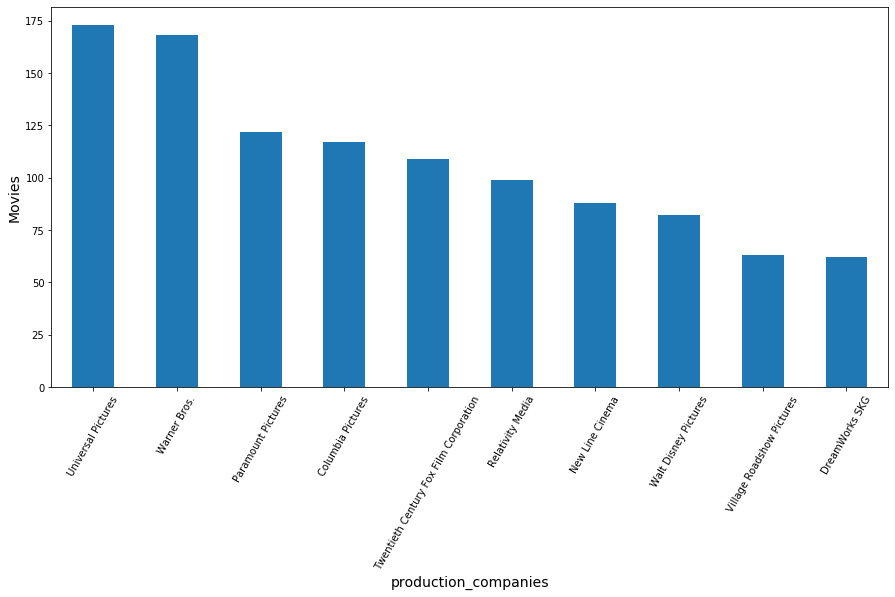

In [57]:
sum_gen = counter(data, 'production_companies')
sum_gen[:10].plot(kind='bar', figsize=(15, 7), fontsize=10)
plt.xticks(rotation=60)
plt.xlabel('production_companies', fontsize=14)
plt.ylabel('Movies', fontsize=14)
sum_gen[:10]

In [58]:
Counter(data.production_companies.str.split('|').sum()).most_common()[0][0]

'Universal Pictures'

In [59]:
answer_ls.append(1)

# 21. Какая студия сняла больше всего фильмов в 2015 году?
Варианты ответа:
1. Universal Pictures
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [60]:
Counter(data[data.release_year == 2015].production_companies.str.split(
    '|').sum()).most_common()[0][0]

'Warner Bros.'

Warner Bros.                              12
Universal Pictures                        10
Twentieth Century Fox Film Corporation     8
Columbia Pictures                          7
Paramount Pictures                         7
TSG Entertainment                          6
Blumhouse Productions                      5
New Line Cinema                            5
RatPac-Dune Entertainment                  5
Legendary Pictures                         5
dtype: int64

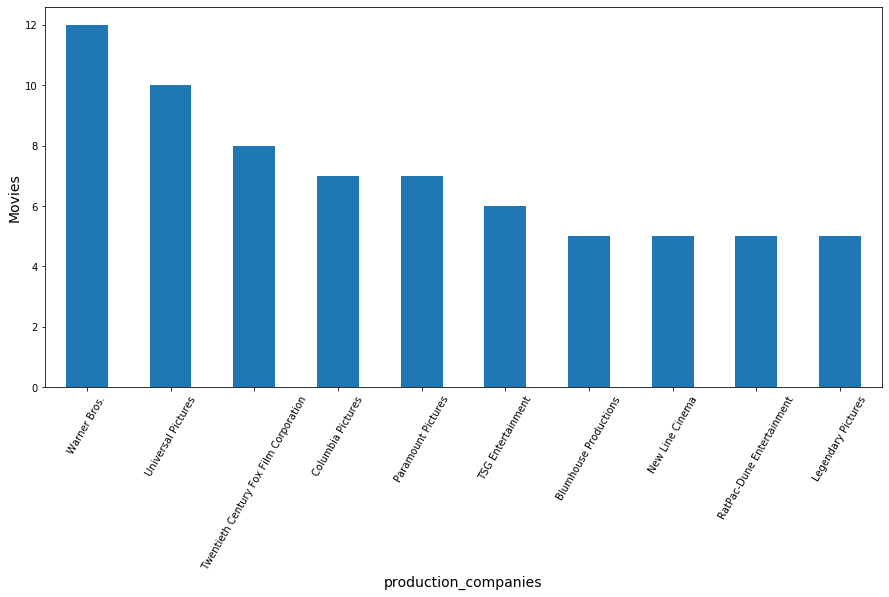

In [61]:
sum_gen = counter(data[data.release_year == 2015], 'production_companies')
sum_gen[:10].plot(kind='bar', figsize=(15, 7), fontsize=10)
plt.xticks(rotation=60)
plt.xlabel('production_companies', fontsize=14)
plt.ylabel('Movies', fontsize=14)
sum_gen[:10]

In [62]:
answer_ls.append(4)

# 22. Какая студия заработала больше всего денег в жанре комедий за все время?
Варианты ответа:
1. Warner Bros
2. Universal Pictures (Universal)
3. Columbia Pictures
4. Paramount Pictures
5. Walt Disney

In [63]:
data_copy = data[data.genres.str.contains('Comedy')].copy()
data_copy['studio_list'] = data_copy.production_companies.str.split('|')
data_copy.explode('studio_list').groupby(by='studio_list').agg({'profit': 'sum'})\
    .sort_values('profit', ascending=False).index[0]

'Universal Pictures'

In [64]:
lst = data.production_companies.str.split('|').sum()
pd.Series({studio: data[(data.genres.str.contains('Comedy')) & (data.production_companies.str.contains(studio))]
           .profit.sum() for studio in lst}).idxmax()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


'Universal'

In [65]:
answer_ls.append(2)

# 23. Какая студия заработала больше всего денег в 2012 году?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Columbia Pictures
4. Paramount Pictures
5. Lucasfilm

In [66]:
data_copy = data[data.release_year == 2012].copy()
data_copy['studio_list'] = data_copy.production_companies.str.split('|')
data_copy.explode('studio_list').groupby(by='studio_list').agg({'profit': 'sum'})\
    .sort_values('profit', ascending=False).index[0]

'Columbia Pictures'

In [67]:
def split_counter_sum_calc_column(data, column='production_companies', calc_column='profit'):
    count = Counter()
    for i in range(0, len(data)):
        for k in data.iloc[i][column].split('|'):
            count[k] += data.iloc[i][calc_column]
    return(count.most_common())

In [68]:
split_counter_sum_calc_column(data[data['release_year'] == 2012],
                              column='production_companies', calc_column='profit')[:5]

[('Columbia Pictures', 2501406608),
 ('Universal Pictures', 1981011579),
 ('Marvel Studios', 1299557910),
 ('Warner Bros.', 1258020056),
 ('Relativity Media', 1032593938)]

In [69]:
answer_ls.append(3)

# 24. Самый убыточный фильм от Paramount Pictures
Варианты ответа:

1. K-19: The Widowmaker tt0267626
2. Next tt0435705
3. Twisted tt0315297
4. The Love Guru tt0811138
5. The Fighter tt0964517

In [70]:
data.loc[data[data.production_companies.str.contains(
    'Paramount Pictures')].profit.idxmin()].original_title

'K-19: The Widowmaker'

In [71]:
answer_ls.append(1)

# 25. Какой Самый прибыльный год (заработали больше всего)?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2002
5. 2015

In [72]:
data.groupby('release_year').agg({'profit': 'sum'}).sort_values(
    by='profit', ascending=False).index[0]

2015

In [73]:
answer_ls.append(5)

# 26. Какой Самый прибыльный год для студии Warner Bros?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2010
5. 2015

In [74]:
data[data.production_companies.str.contains('Warner Bros')].groupby('release_year').agg({'profit': 'sum'})\
    .sort_values(by='profit', ascending=False).index[0]

2014

In [75]:
answer_ls.append(1)

# 27. В каком месяце за все годы суммарно вышло больше всего фильмов?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [76]:
data['release_dt'] = pd.to_datetime(data['release_date'], format='%m/%d/%Y')
Counter(data.release_dt.dt.month_name()).most_common()[0][0]

'September'

In [77]:
data.release_dt.dt.month_name().value_counts().index[0]

'September'

In [78]:
answer_ls.append(4)

# 28. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)
Варианты ответа:
1. 345
2. 450
3. 478
4. 523
5. 381

In [79]:
len(data[data.release_dt.dt.month_name().isin(['June', 'July', 'August'])])

450

In [80]:
answer_ls.append(2)

# 29. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
Варианты ответов:
1. Steven Soderbergh
2. Christopher Nolan
3. Clint Eastwood
4. Ridley Scott
5. Peter Jackson

In [81]:
data_copy = data[data.release_dt.dt.month_name().isin(
    ['December', 'January', 'February'])].copy()
data_copy['director_list'] = data_copy.director.str.split('|')
data_copy.explode('director_list').groupby(by='director_list').agg({'original_title': 'count'})\
    .sort_values('original_title', ascending=False).head()

,original_title
director_list,
Peter Jackson,7
Steven Soderbergh,6
Clint Eastwood,6
Shawn Levy,4
Adam Shankman,4


In [82]:
answer_ls.append(5)

# 30. Какой месяц чаще всего по годам самый прибыльный?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [83]:
years = set(data.release_dt.dt.year.tolist())
month_lst = []
for year_now in years:
    month_lst.append(data[data.release_dt.dt.year == year_now].
                     groupby(data.release_dt.dt.month_name()).agg({'profit': 'sum'}).idxmax()[0])
Counter(month_lst).most_common()[0][0]

'June'

In [84]:
data['month'] = data['release_dt'].dt.month_name()
piv = data.pivot_table(values='profit', index=[
                       'release_year'], columns=['month'], aggfunc='sum')
piv.idxmax(axis=1).value_counts().index[0]

'June'

In [85]:
answer_ls.append(2)

# 31. Названия фильмов какой студии в среднем самые длинные по количеству символов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

In [86]:
data_copy = data.copy()
data_copy['title_len'] = data_copy.original_title.apply(len)
data_copy['studio'] = data_copy.production_companies.str.split('|')
data_copy.explode('studio').groupby('studio').agg(
    {'title_len': 'mean'}).idxmax()[0]

'Four By Two Productions'

In [87]:
answer_ls.append(5)

# 32. Названия фильмов какой студии в среднем самые длинные по количеству слов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

In [88]:
data_copy = data.copy()
data_copy['title_nwrds'] = data_copy.original_title.str.split(
    ' ').map(lambda x: len(str(x).split(' ')))
data_copy['studio'] = data_copy.production_companies.str.split('|')
data_copy.explode('studio').groupby('studio').agg(
    {'title_nwrds': 'mean'}).idxmax()[0]

'Four By Two Productions'

In [89]:
answer_ls.append(5)

# 33. Сколько разных слов используется в названиях фильмов?(без учета регистра)
Варианты ответа:
1. 6540
2. 1002
3. 2461
4. 28304
5. 3432

In [90]:
len(set(data.original_title.str.lower().str.split().sum()))

2461

In [91]:
answer_ls.append(3)

# 34. Какие фильмы входят в 1 процент лучших по рейтингу?
Варианты ответа:
1. Inside Out, Gone Girl, 12 Years a Slave
2. BloodRayne, The Adventures of Rocky & Bullwinkle
3. The Lord of the Rings: The Return of the King
4. 300, Lucky Number Slevin

In [92]:
data.loc[data.vote_average.sort_values(
    ascending=False).head(20).index].original_title

600                                       The Dark Knight
125                                    The Imitation Game
34                                                   Room
118                                          Interstellar
9                                              Inside Out
370                                             Inception
873                                           The Pianist
119                               Guardians of the Galaxy
1082        The Lord of the Rings: The Return of the King
1184                              The Wolf of Wall Street
138                              The Grand Budapest Hotel
128                                             Gone Girl
1192                                     12 Years a Slave
1801                                              Memento
283                                            Mr. Nobody
28                                              Spotlight
177                                The Fault in Our Stars
864           

In [93]:
answer_ls.append(1)

# 35. Какие актеры чаще всего снимаются в одном фильме вместе
Варианты ответа:
1. Johnny Depp & Helena Bonham Carter
2. Hugh Jackman & Ian McKellen
3. Vin Diesel & Paul Walker
4. Adam Sandler & Kevin James
5. Daniel Radcliffe & Rupert Grint

In [94]:
from itertools import combinations
data_copy = data.copy()
data_copy['pairs'] = data_copy.cast.apply(
    lambda x: list(combinations(x.split('|'), 2)))
data_copy.explode('pairs').pairs.value_counts().head()

(Daniel Radcliffe, Emma Watson)        8
(Daniel Radcliffe, Rupert Grint)       8
(Rupert Grint, Emma Watson)            7
(Johnny Depp, Helena Bonham Carter)    6
(Ben Stiller, Owen Wilson)             6
Name: pairs, dtype: int64

In [95]:
answer_ls.append(5)

# 36. У какого из режиссеров выше вероятность выпустить фильм в прибыли? (5 баллов)101
Варианты ответа:
1. Quentin Tarantino
2. Steven Soderbergh
3. Robert Rodriguez
4. Christopher Nolan
5. Clint Eastwood

In [96]:
data_copy = data.copy()
data_copy['isprofit'] = data_copy.profit > 0
data_copy['director_list'] = data_copy.director.str.split('|')
data_copy.explode('director_list').groupby(by='director_list').agg({'isprofit': 'mean'})\
    .loc[['Quentin Tarantino', 'Steven Soderbergh', 'Robert Rodriguez', 'Christopher Nolan', 'Clint Eastwood'], :]

,isprofit
director_list,
Quentin Tarantino,0.857143
Steven Soderbergh,0.769231
Robert Rodriguez,0.727273
Christopher Nolan,1.000000
Clint Eastwood,0.833333


In [97]:
answer_ls.append(4)

# Submission

In [98]:
len(answer_ls)

36

In [99]:
pd.DataFrame({'Id':range(1,len(answer_ls)+1), 'Answer':answer_ls}, columns=['Id', 'Answer'])

,Id,Answer
0,1,4
1,2,2
2,3,3
3,4,2
4,5,1
5,6,5
6,7,2
7,8,1
8,9,4
9,10,5
